Import all the libraries

In [41]:
#base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#train test split
from sklearn.model_selection import train_test_split
#accuracy information
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
#scaler
from sklearn.preprocessing import StandardScaler
#sequential model import
from tensorflow.keras.models import Sequential
#import layer specifics
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#import optimizer
from tensorflow.keras.optimizers import Adam
#see architecture
from tensorflow.keras.utils import plot_model
#confusion matrix
from sklearn.metrics import confusion_matrix
#roc auc curve
from sklearn.metrics import roc_curve, auc

In [43]:
#import the dataset
from ucimlrepo import fetch_ucirepo

preliminary dataset cleaning and modifying

In [44]:
#define the variables
parkinsons = fetch_ucirepo(id=174) 
X = parkinsons.data.features
y = parkinsons.data.targets

In [45]:
#define the selected features (that we can detect)
selected_features = [
    'MDVP:Fo', 'MDVP:Fhi', 'MDVP:Flo', 'MDVP:Jitter', 'MDVP:Shimmer', 
    'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'
]
#turn X into all the features
X = X[selected_features]

In [46]:
#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#turn the target into an integer
y = y.astype(int)

#split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# convert the train test splits into numpy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [47]:
#use the best hyperparameters (defined from previous experiments)
#NOT USING NOT USING
best_neurons = 128
best_learning_rate = 0.001
best_dropout_rate = 0.3
best_batch_size = 16
input_shape = 15  #make sure that its the proper number

#Create the optimized model!
model = Sequential([
    Dense(256, activation='relu', input_shape=(input_shape,)),
    BatchNormalization(),  #fix activation
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


#use the best learning rate (hyperparameter)
optimizer = Adam(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# TRAIN
history = model.fit(X_train, y_train, epochs=50, batch_size=best_batch_size, validation_data=(X_test, y_test))


Epoch 1/50


C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6231 - loss: 0.7045 - val_accuracy: 0.6923 - val_loss: 0.6228
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7935 - loss: 0.4233 - val_accuracy: 0.8718 - val_loss: 0.5494
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8884 - loss: 0.3104 - val_accuracy: 0.8718 - val_loss: 0.4925
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9152 - loss: 0.2292 - val_accuracy: 0.8974 - val_loss: 0.4383
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9037 - loss: 0.2471 - val_accuracy: 0.9231 - val_loss: 0.3929
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9622 - loss: 0.1676 - val_accuracy: 0.9231 - val_loss: 0.3563
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8938 - loss: 0.2058 - val_accuracy: 0.9231 - val_loss: 0.3249
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8868 - loss: 0.1844 - val_accuracy: 0.9231 - val_loss: 0.2981
Ep

In [48]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9829 - loss: 0.1261
Test Accuracy: 0.97


Visualize the data

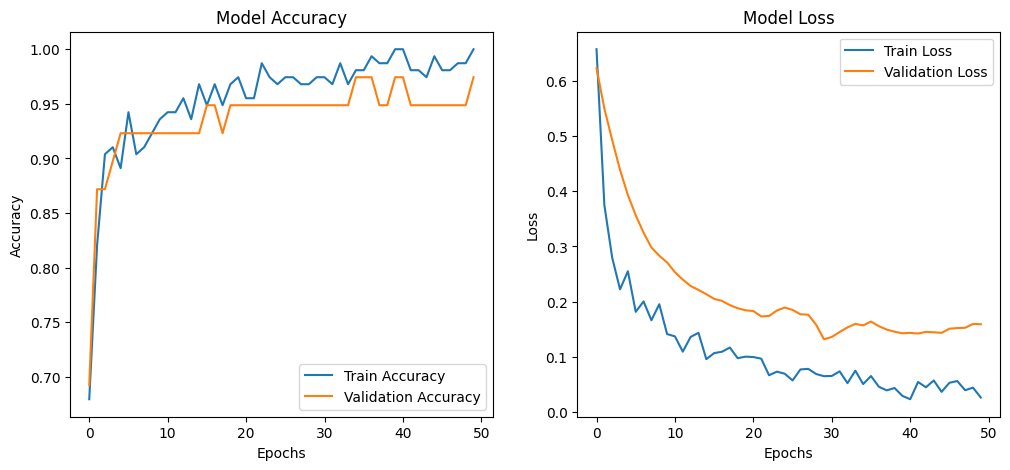

In [49]:
#see the accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

#see the loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

See model architecture

In [50]:
#self describing
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Confusion Matrix

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000027948990E00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


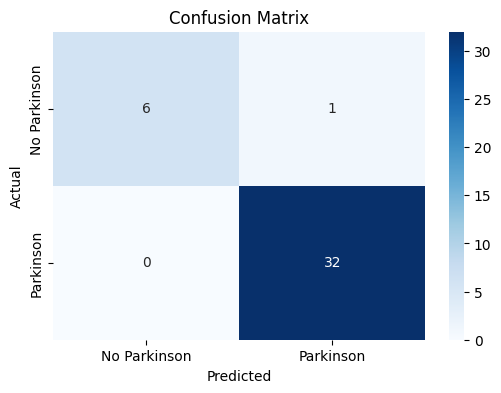

In [51]:
#predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

#solve for the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Parkinson', 'Parkinson'], yticklabels=['No Parkinson', 'Parkinson'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC, AUC curve

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


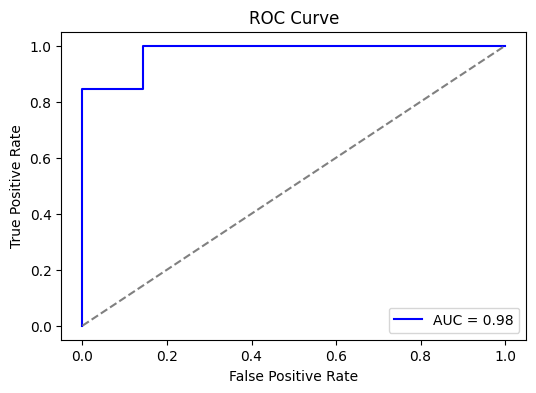

In [52]:
#probability of predicting
y_probs = model.predict(X_test).ravel()

#math
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

#plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()